In [1]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_validate
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression


2022-05-07 21:21:06.227667: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-07 21:21:06.227690: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
# (X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
tf.test.gpu_device_name()


''

In [ ]:
X_train.shape


(50000, 32, 32, 3)

[1]


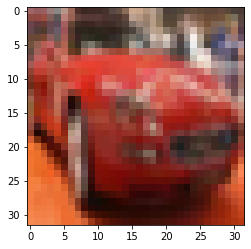

In [ ]:
i = 5
plt.imshow(X_train[i], cmap=plt.get_cmap("gray"))
print(y_train[i])


In [ ]:
n_epochs = 50


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 400)               1229200   
                                                                 
 dense_1 (Dense)             (None, 100)               40100     
                                                                 
 dense_2 (Dense)             (None, 30)                3030      
                                                                 
 dense_3 (Dense)             (None, 10)                310       
                                                                 
Total params: 1,272,640
Trainable params: 1,272,640
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1407/1407 [========================

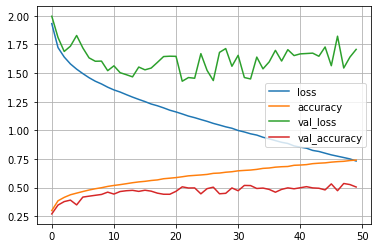

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

history = model.fit(X_train, y_train, epochs=n_epochs, validation_split=0.1)
model.evaluate(X_test, y_test)
pd_history = pd.DataFrame(history.history)
pd_history.plot()
plt.grid(True)
plt.show()


In [ ]:
y_proba = model.predict(X_test[:10])
y_proba.round(2)


array([[0.  , 0.  , 0.  , 0.03, 0.  , 0.97, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.98, 0.01],
       [0.11, 0.15, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.72, 0.01],
       [0.02, 0.  , 0.03, 0.  , 0.01, 0.  , 0.  , 0.01, 0.93, 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.08, 0.01, 0.9 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.03, 0.  , 0.06, 0.9 , 0.  , 0.  , 0.  ],
       [0.  , 0.98, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, 0.03, 0.  , 0.  , 0.94, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.18, 0.01, 0.03, 0.73, 0.  , 0.04, 0.  , 0.  ],
       [0.  , 0.87, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.1 ]],
      dtype=float32)

### Architecture

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 200)               614600    
                                                                 
 dense_5 (Dense)             (None, 200)               40200     
                                                                 
 dense_6 (Dense)             (None, 200)               40200     
                                                                 
 dense_7 (Dense)             (None, 200)               40200     
                                                                 
Total params: 735,200
Trainable params: 735,200
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1407/1407 [==========================

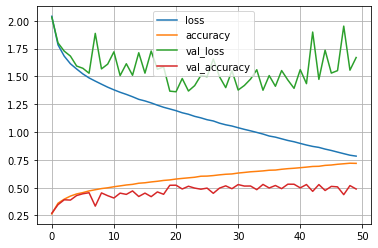

In [ ]:
neurons_layer = 200
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(neurons_layer, activation="relu"))
model.add(keras.layers.Dense(neurons_layer, activation="relu"))
model.add(keras.layers.Dense(neurons_layer, activation="relu"))
model.add(keras.layers.Dense(neurons_layer, activation="softmax"))
model.summary()

model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

history = model.fit(X_train, y_train, epochs=n_epochs, validation_split=0.1)
model.evaluate(X_test, y_test)
pd_history = pd.DataFrame(history.history)
pd_history.plot()
plt.grid(True)
plt.show()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 100)               307300    
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
Total params: 337,600
Trainable params: 337,600
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1407/1407 [==========================

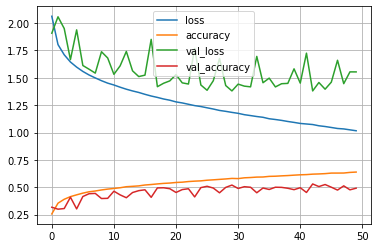

In [ ]:
neurons_layer = 100
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(neurons_layer, activation="relu"))
model.add(keras.layers.Dense(neurons_layer, activation="relu"))
model.add(keras.layers.Dense(neurons_layer, activation="relu"))
model.add(keras.layers.Dense(neurons_layer, activation="softmax"))
model.summary()

model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

history = model.fit(X_train, y_train, epochs=n_epochs, validation_split=0.1)
model.evaluate(X_test, y_test)
pd_history = pd.DataFrame(history.history)
pd_history.plot()
plt.grid(True)
plt.show()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 50)                153650    
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dense_14 (Dense)            (None, 50)                2550      
                                                                 
 dense_15 (Dense)            (None, 50)                2550      
                                                                 
Total params: 161,300
Trainable params: 161,300
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1407/1407 [==========================

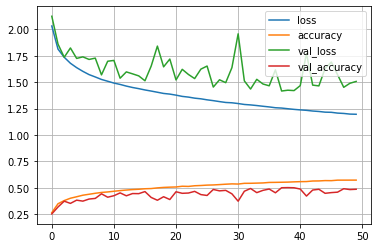

In [ ]:
neurons_layer = 50
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(neurons_layer, activation="relu"))
model.add(keras.layers.Dense(neurons_layer, activation="relu"))
model.add(keras.layers.Dense(neurons_layer, activation="relu"))
model.add(keras.layers.Dense(neurons_layer, activation="softmax"))
model.summary()

model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

history = model.fit(X_train, y_train, epochs=n_epochs, validation_split=0.1)
model.evaluate(X_test, y_test)
pd_history = pd.DataFrame(history.history)
pd_history.plot()
plt.grid(True)
plt.show()


### Funções de Ativação

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_16 (Dense)            (None, 200)               614600    
                                                                 
 dense_17 (Dense)            (None, 200)               40200     
                                                                 
 dense_18 (Dense)            (None, 200)               40200     
                                                                 
 dense_19 (Dense)            (None, 200)               40200     
                                                                 
Total params: 735,200
Trainable params: 735,200
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1407/1407 [==========================

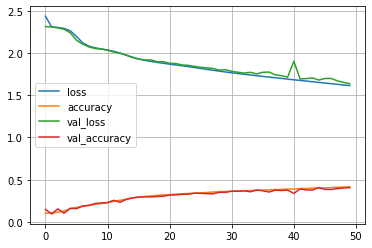

In [ ]:
neurons_layer = 200
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(neurons_layer, activation="sigmoid"))
model.add(keras.layers.Dense(neurons_layer, activation="sigmoid"))
model.add(keras.layers.Dense(neurons_layer, activation="sigmoid"))
model.add(keras.layers.Dense(neurons_layer, activation="softmax"))
model.summary()

model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

history2 = model.fit(X_train, y_train, epochs=n_epochs, validation_split=0.1)

model.evaluate(X_test, y_test)
pd_history2 = pd.DataFrame(history2.history)
pd_history2.plot()
plt.grid(True)
plt.show()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 3072)              0         
                                                                 
 dense_20 (Dense)            (None, 200)               614600    
                                                                 
 dense_21 (Dense)            (None, 200)               40200     
                                                                 
 dense_22 (Dense)            (None, 200)               40200     
                                                                 
 dense_23 (Dense)            (None, 200)               40200     
                                                                 
Total params: 735,200
Trainable params: 735,200
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1407/1407 [==========================

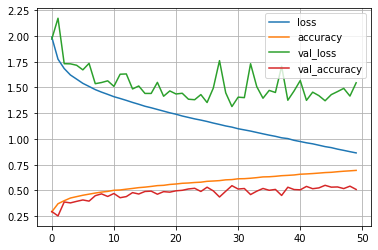

In [ ]:
neurons_layer = 200
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(neurons_layer, activation="elu"))
model.add(keras.layers.Dense(neurons_layer, activation="elu"))
model.add(keras.layers.Dense(neurons_layer, activation="elu"))
model.add(keras.layers.Dense(neurons_layer, activation="softmax"))
model.summary()


model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

history2 = model.fit(X_train, y_train, epochs=n_epochs, validation_split=0.1)

model.evaluate(X_test, y_test)
pd_history2 = pd.DataFrame(history2.history)
pd_history2.plot()
plt.grid(True)
plt.show()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 3072)              0         
                                                                 
 dense_24 (Dense)            (None, 200)               614600    
                                                                 
 dense_25 (Dense)            (None, 200)               40200     
                                                                 
 dense_26 (Dense)            (None, 200)               40200     
                                                                 
 dense_27 (Dense)            (None, 200)               40200     
                                                                 
Total params: 735,200
Trainable params: 735,200
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1407/1407 [==========================

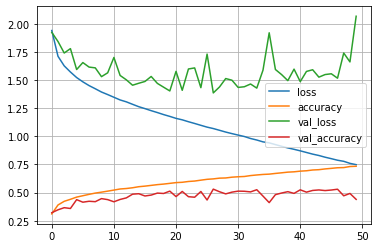

In [ ]:
neurons_layer = 200
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
model.add(keras.layers.Dense(neurons_layer, activation="softmax"))
model.summary()

model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

history2 = model.fit(X_train, y_train, epochs=n_epochs, validation_split=0.1)

model.evaluate(X_test, y_test)
pd_history2 = pd.DataFrame(history2.history)
pd_history2.plot()
plt.grid(True)
plt.show()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_28 (Dense)            (None, 200)               614600    
                                                                 
 dense_29 (Dense)            (None, 200)               40200     
                                                                 
 dense_30 (Dense)            (None, 200)               40200     
                                                                 
 dense_31 (Dense)            (None, 200)               40200     
                                                                 
Total params: 735,200
Trainable params: 735,200
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1407/1407 [==========================

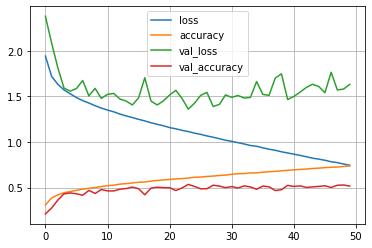

In [ ]:
neurons_layer = 200
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
keras.layers.BatchNormalization()
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
keras.layers.BatchNormalization()
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
keras.layers.BatchNormalization()
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
keras.layers.BatchNormalization()
model.add(keras.layers.Dense(neurons_layer, activation="softmax"))
model.summary()

model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

history2 = model.fit(X_train, y_train, epochs=n_epochs, validation_split=0.1)

model.evaluate(X_test, y_test)
pd_history2 = pd.DataFrame(history2.history)
pd_history2.plot()
plt.grid(True)
plt.show()


### Otimizadores

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 3072)              0         
                                                                 
 dense_32 (Dense)            (None, 200)               614600    
                                                                 
 dense_33 (Dense)            (None, 200)               40200     
                                                                 
 dense_34 (Dense)            (None, 200)               40200     
                                                                 
 dense_35 (Dense)            (None, 200)               40200     
                                                                 
Total params: 735,200
Trainable params: 735,200
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8844 - accuracy: 0.3351 - val_loss: 1.8130 - val_accuracy: 0.3784
Epoch 2/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6763 - accuracy: 0.4090 - val_loss: 1.6607 - val_accuracy: 0.4034
Epoch 3/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5943 - accuracy: 0.4354 - val_loss: 1.5893 - val_accuracy: 0.4448
Epoch 4/50
1407/1407 [==============================] - 6s 5ms/step - loss: 1.5358 - accuracy: 0.4557 - val_loss: 1.5239 - val_accuracy: 0.4620
Epoch 5/50
1407/1407 [==============================] - 6s 5ms/step - loss: 1.4910 - accuracy: 0.4706 - val_loss: 1.5538 - val_accuracy: 0.4476
Epoch 6/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4520 - accuracy: 0.4854 - val_loss: 1.4977 - val_accuracy: 0.4750
Epoch 7/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4192 - accuracy: 0.4973 - val_loss: 1.4715 - val_accuracy:

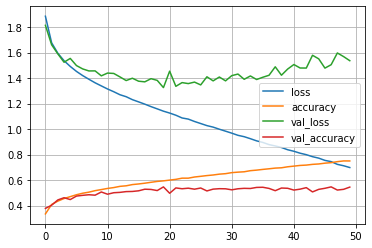

In [ ]:
neurons_layer = 200
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
keras.layers.BatchNormalization()
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
keras.layers.BatchNormalization()
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
keras.layers.BatchNormalization()
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
keras.layers.BatchNormalization()
model.add(keras.layers.Dense(neurons_layer, activation="softmax"))
model.summary()

opt = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

history2 = model.fit(X_train, y_train, epochs=n_epochs, validation_split=0.1)

model.evaluate(X_test, y_test)
pd_history2 = pd.DataFrame(history2.history)
pd_history2.plot()
plt.grid(True)
plt.show()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 3072)              0         
                                                                 
 dense_36 (Dense)            (None, 200)               614600    
                                                                 
 dense_37 (Dense)            (None, 200)               40200     
                                                                 
 dense_38 (Dense)            (None, 200)               40200     
                                                                 
 dense_39 (Dense)            (None, 200)               40200     
                                                                 
Total params: 735,200
Trainable params: 735,200
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1407/1407 [==========================

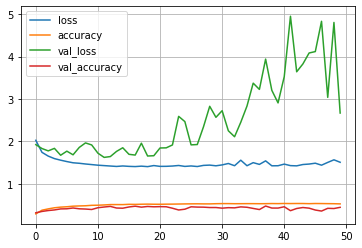

In [ ]:
neurons_layer = 200
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
keras.layers.BatchNormalization()
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
keras.layers.BatchNormalization()
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
keras.layers.BatchNormalization()
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
keras.layers.BatchNormalization()
model.add(keras.layers.Dense(neurons_layer, activation="softmax"))
model.summary()

model.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)

history2 = model.fit(X_train, y_train, epochs=n_epochs, validation_split=0.1)

model.evaluate(X_test, y_test)
pd_history2 = pd.DataFrame(history2.history)
pd_history2.plot()
plt.grid(True)
plt.show()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 3072)              0         
                                                                 
 dense_40 (Dense)            (None, 200)               614600    
                                                                 
 dense_41 (Dense)            (None, 200)               40200     
                                                                 
 dense_42 (Dense)            (None, 200)               40200     
                                                                 
 dense_43 (Dense)            (None, 200)               40200     
                                                                 
Total params: 735,200
Trainable params: 735,200
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1407/1407 [=========================

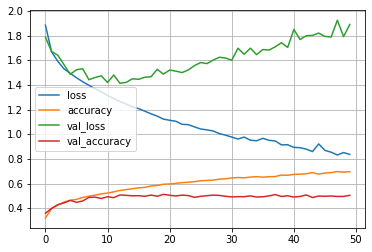

In [ ]:
neurons_layer = 200
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
keras.layers.BatchNormalization()
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
keras.layers.BatchNormalization()
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
keras.layers.BatchNormalization()
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
keras.layers.BatchNormalization()
model.add(keras.layers.Dense(neurons_layer, activation="softmax"))
model.summary()

model.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

history2 = model.fit(X_train, y_train, epochs=n_epochs, validation_split=0.1)

model.evaluate(X_test, y_test)
pd_history2 = pd.DataFrame(history2.history)
pd_history2.plot()
plt.grid(True)
plt.show()


### Regularização

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 3072)              0         
                                                                 
 dense_44 (Dense)            (None, 200)               614600    
                                                                 
 dense_45 (Dense)            (None, 200)               40200     
                                                                 
 dense_46 (Dense)            (None, 200)               40200     
                                                                 
 dense_47 (Dense)            (None, 200)               40200     
                                                                 
Total params: 735,200
Trainable params: 735,200
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8877 - accuracy: 0.3350 - val_loss: 1.7648 - val_accuracy: 0.3760
Epoch 2/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6773 - accuracy: 0.4034 - val_loss: 1.6933 - val_accuracy: 0.4042
Epoch 3/50
1407/1407 [==============================] - 6s 5ms/step - loss: 1.5949 - accuracy: 0.4349 - val_loss: 1.5779 - val_accuracy: 0.4438
Epoch 4/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5365 - accuracy: 0.4544 - val_loss: 1.5250 - val_accuracy: 0.4550
Epoch 5/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4910 - accuracy: 0.4702 - val_loss: 1.5187 - val_accuracy: 0.4602
Epoch 6/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4526 - accuracy: 0.4858 - val_loss: 1.4778 - val_accuracy: 0.4722
Epoch 7/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4193 - accuracy: 0.4966 - val_loss: 1.5084 - val_accuracy:

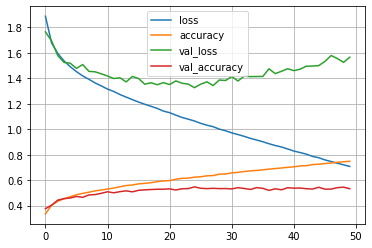

In [ ]:
neurons_layer = 200
dropout_rate = 0.2
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
model.add(keras.layers.Dense(neurons_layer, activation="softmax"))
model.summary()

opt = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

history2 = model.fit(X_train, y_train, epochs=n_epochs, validation_split=0.1)

model.evaluate(X_test, y_test)
pd_history2 = pd.DataFrame(history2.history)
pd_history2.plot()
plt.grid(True)
plt.show()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 3072)              0         
                                                                 
 dense_48 (Dense)            (None, 200)               614600    
                                                                 
 dense_49 (Dense)            (None, 200)               40200     
                                                                 
 dense_50 (Dense)            (None, 200)               40200     
                                                                 
 dense_51 (Dense)            (None, 200)               40200     
                                                                 
Total params: 735,200
Trainable params: 735,200
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8955 - accuracy: 0.3319 - val_loss: 1.7965 - val_accuracy: 0.3422
Epoch 2/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6876 - accuracy: 0.4012 - val_loss: 1.7192 - val_accuracy: 0.4014
Epoch 3/50
1407/1407 [==============================] - 6s 5ms/step - loss: 1.5988 - accuracy: 0.4342 - val_loss: 1.5890 - val_accuracy: 0.4356
Epoch 4/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5443 - accuracy: 0.4557 - val_loss: 1.5737 - val_accuracy: 0.4422
Epoch 5/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4994 - accuracy: 0.4688 - val_loss: 1.5504 - val_accuracy: 0.4442
Epoch 6/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4605 - accuracy: 0.4826 - val_loss: 1.5145 - val_accuracy: 0.4642
Epoch 7/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4278 - accuracy: 0.4936 - val_loss: 1.4703 - val_accuracy:

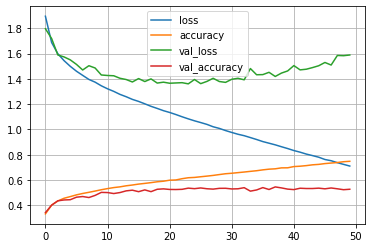

In [ ]:
neurons_layer = 200
dropout_rate = 0.2
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
keras.layers.BatchNormalization()
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
keras.layers.BatchNormalization()
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
keras.layers.BatchNormalization()
model.add(keras.layers.Dense(neurons_layer, activation="softmax"))
model.summary()

opt = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

history2 = model.fit(X_train, y_train, epochs=n_epochs, validation_split=0.1)

model.evaluate(X_test, y_test)
pd_history2 = pd.DataFrame(history2.history)
pd_history2.plot()
plt.grid(True)
plt.show()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 3072)              0         
                                                                 
 dropout (Dropout)           (None, 3072)              0         
                                                                 
 dense_52 (Dense)            (None, 200)               614600    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_53 (Dense)            (None, 200)               40200     
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_54 (Dense)            (None, 200)             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
1407/1407 [==============================] - 8s 5ms/step - loss: 2.1371 - accuracy: 0.2479 - val_loss: 1.8308 - val_accuracy: 0.3506
Epoch 2/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8974 - accuracy: 0.3152 - val_loss: 1.7581 - val_accuracy: 0.3692
Epoch 3/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8295 - accuracy: 0.3421 - val_loss: 1.7403 - val_accuracy: 0.3682
Epoch 4/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7846 - accuracy: 0.3582 - val_loss: 1.7062 - val_accuracy: 0.3878
Epoch 5/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7559 - accuracy: 0.3687 - val_loss: 1.6562 - val_accuracy: 0.4056
Epoch 6/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7310 - accuracy: 0.3773 - val_loss: 1.6337 - val_accuracy: 0.4166
Epoch 7/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7110 - accuracy: 0.3846 - val_loss: 1.6125 - val_accuracy:

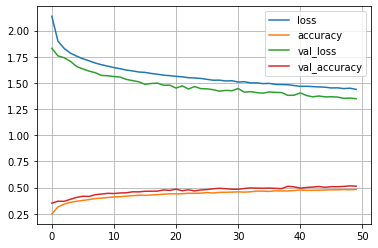

In [ ]:
neurons_layer = 200
dropout_rate = 0.2
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dropout(rate=dropout_rate))
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
model.add(keras.layers.Dropout(rate=dropout_rate))
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
model.add(keras.layers.Dropout(rate=dropout_rate))
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
model.add(keras.layers.Dropout(rate=dropout_rate))
model.add(keras.layers.Dense(neurons_layer, activation="softmax"))
model.summary()

opt = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

history2 = model.fit(X_train, y_train, epochs=n_epochs, validation_split=0.1)

model.evaluate(X_test, y_test)
pd_history2 = pd.DataFrame(history2.history)
pd_history2.plot()
plt.grid(True)
plt.show()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 3072)              0         
                                                                 
 dropout_4 (Dropout)         (None, 3072)              0         
                                                                 
 dense_56 (Dense)            (None, 200)               614600    
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 dense_57 (Dense)            (None, 200)               40200     
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                                 
 dense_58 (Dense)            (None, 200)             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
1407/1407 [==============================] - 8s 5ms/step - loss: 2.1412 - accuracy: 0.2424 - val_loss: 1.8387 - val_accuracy: 0.3444
Epoch 2/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.9047 - accuracy: 0.3142 - val_loss: 1.7591 - val_accuracy: 0.3738
Epoch 3/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8334 - accuracy: 0.3419 - val_loss: 1.7114 - val_accuracy: 0.3806
Epoch 4/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7884 - accuracy: 0.3560 - val_loss: 1.6840 - val_accuracy: 0.3980
Epoch 5/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7523 - accuracy: 0.3709 - val_loss: 1.6916 - val_accuracy: 0.4028
Epoch 6/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7267 - accuracy: 0.3816 - val_loss: 1.6284 - val_accuracy: 0.4154
Epoch 7/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7074 - accuracy: 0.3877 - val_loss: 1.6176 - val_accuracy:

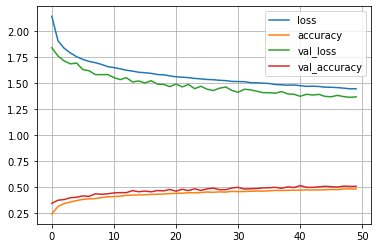

In [ ]:
neurons_layer = 200
dropout_rate = 0.2
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
keras.layers.BatchNormalization()
model.add(keras.layers.Dropout(rate=dropout_rate))
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
keras.layers.BatchNormalization()
model.add(keras.layers.Dropout(rate=dropout_rate))
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
keras.layers.BatchNormalization()
model.add(keras.layers.Dropout(rate=dropout_rate))
model.add(
    keras.layers.Dense(neurons_layer, activation="elu", kernel_initializer="he_normal")
)
keras.layers.BatchNormalization()
model.add(keras.layers.Dropout(rate=dropout_rate))
model.add(keras.layers.Dense(neurons_layer, activation="softmax"))
model.summary()

opt = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

history2 = model.fit(X_train, y_train, epochs=n_epochs, validation_split=0.1)

model.evaluate(X_test, y_test)
pd_history2 = pd.DataFrame(history2.history)
pd_history2.plot()
plt.grid(True)
plt.show()


### Outros Métodos de AM

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


def evaluateModel(model, X, y):
    pred = model.predict(X)
    mse = mean_squared_error(y, pred)
    r2 = r2_score(y, pred)
    return mse, r2


X_trainA = X_train.reshape(X_train.shape[0], 32 * 32 * 3)
X_testA = X_test.reshape(X_test.shape[0], 32 * 32 * 3)

y_trainA = y_train.reshape(y_train.shape[0])
y_testA = y_test.reshape(y_test.shape[0])


lr = LogisticRegression()
lr.fit(X_trainA, y_trainA)
pred = lr.predict(X_testA)
print("accuracy:", accuracy_score(y_testA, pred))

rf = RandomForestClassifier()
rf.fit(X_trainA, y_trainA)
pred = rf.predict(X_testA)
print("accuracy:", accuracy_score(y_testA, pred))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


accuracy: 0.4063
accuracy: 0.4667
